In [1]:
#Import Libraries

import matplotlib
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
plt.style.use('ggplot')
%matplotlib inline

#Adjusts the confriguration which we will create
matplotlib.rcParams['figure.figsize'] = (12,8)

In [2]:
df = pd.read_csv(r'C:\Users\user\Downloads\Movie_industry_dataset\movies.csv')

In [3]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [4]:
# Find the no of missing values

df.isnull().sum()

name           0
rating        77
genre          0
year           0
released       2
score          3
votes          3
director       0
writer         3
star           1
country        3
budget      2171
gross        189
company       17
runtime        4
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7668 entries, 0 to 7667
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      7668 non-null   object 
 1   rating    7591 non-null   object 
 2   genre     7668 non-null   object 
 3   year      7668 non-null   int64  
 4   released  7666 non-null   object 
 5   score     7665 non-null   float64
 6   votes     7665 non-null   float64
 7   director  7668 non-null   object 
 8   writer    7665 non-null   object 
 9   star      7667 non-null   object 
 10  country   7665 non-null   object 
 11  budget    5497 non-null   float64
 12  gross     7479 non-null   float64
 13  company   7651 non-null   object 
 14  runtime   7664 non-null   float64
dtypes: float64(5), int64(1), object(9)
memory usage: 898.7+ KB


In [6]:
print(df['rating'])

0         R
1         R
2        PG
3        PG
4         R
       ... 
7663    NaN
7664    NaN
7665    NaN
7666    NaN
7667    NaN
Name: rating, Length: 7668, dtype: object


In [7]:
df['rating'].tail(20)

7648            R
7649           PG
7650           PG
7651           PG
7652    Not Rated
7653            R
7654          NaN
7655        TV-PG
7656        PG-13
7657          NaN
7658            R
7659    Not Rated
7660          NaN
7661            R
7662          NaN
7663          NaN
7664          NaN
7665          NaN
7666          NaN
7667          NaN
Name: rating, dtype: object

In [8]:
df['rating'] = df['rating'].fillna(df['rating'].mode()[0])
df['rating'].isnull().sum()

0

In [9]:
df['rating'].tail(20)

7648            R
7649           PG
7650           PG
7651           PG
7652    Not Rated
7653            R
7654            R
7655        TV-PG
7656        PG-13
7657            R
7658            R
7659    Not Rated
7660            R
7661            R
7662            R
7663            R
7664            R
7665            R
7666            R
7667            R
Name: rating, dtype: object

In [10]:
df['score'] = df['score'].fillna(df['score'].mode()[0])
df['score'] = df['score'].astype('int')

df['votes'] = df['votes'].fillna(df['votes'].mode()[0])
df['votes'] = df['votes'].astype('int')

df['budget'] = df['budget'].fillna(df['budget'].mode()[0])
df['budget'] = df['budget'].astype('int')

df['gross'] = df['gross'].fillna(df['gross'].mode()[0])
df['gross'] = df['gross'].astype('int')

df['runtime'] = df['runtime'].fillna(df['runtime'].mode()[0])
df['runtime'] = df['runtime'].astype('int')

In [11]:
df['company'] = df['company'].fillna(df['company'].mode()[0])

df['country'] = df['country'].fillna(df['country'].mode()[0])

df['writer'] = df['writer'].fillna(df['writer'].mode()[0]) 

df['star'] = df['star'].fillna(df['star'].mode()[0])

In [12]:
df = df.drop(['released'],axis=1)

In [13]:
df.isnull().sum()

name        0
rating      0
genre       0
year        0
score       0
votes       0
director    0
writer      0
star        0
country     0
budget      0
gross       0
company     0
runtime     0
dtype: int64

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7668 entries, 0 to 7667
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   name      7668 non-null   object
 1   rating    7668 non-null   object
 2   genre     7668 non-null   object
 3   year      7668 non-null   int64 
 4   score     7668 non-null   int32 
 5   votes     7668 non-null   int32 
 6   director  7668 non-null   object
 7   writer    7668 non-null   object
 8   star      7668 non-null   object
 9   country   7668 non-null   object
 10  budget    7668 non-null   int32 
 11  gross     7668 non-null   int32 
 12  company   7668 non-null   object
 13  runtime   7668 non-null   int32 
dtypes: int32(5), int64(1), object(8)
memory usage: 689.1+ KB


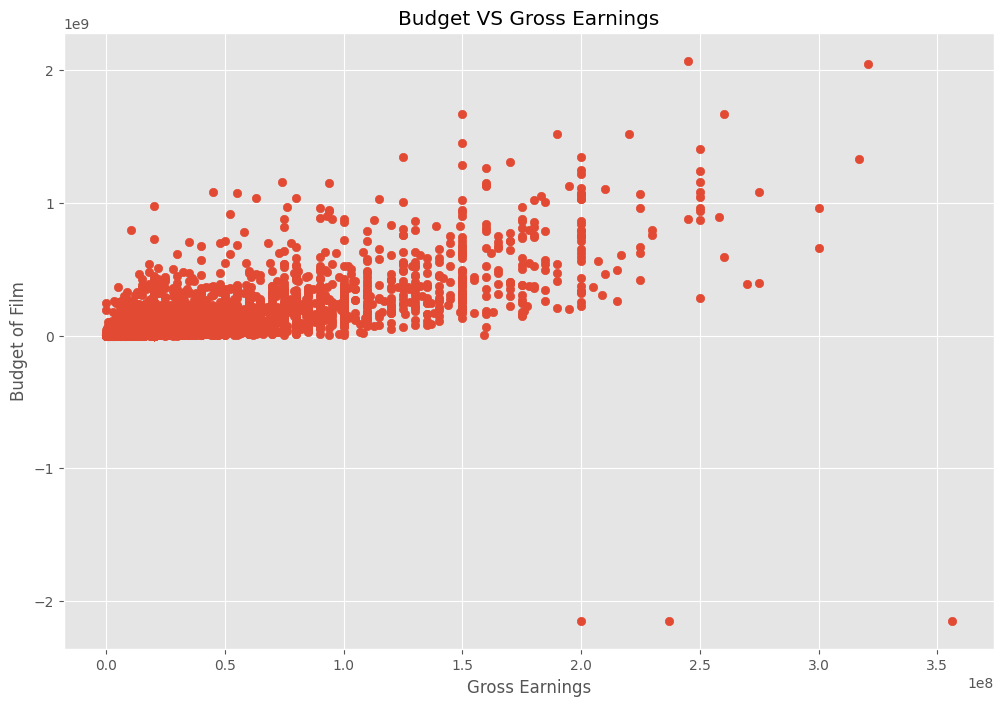

In [15]:
plt.scatter(x=df['budget'],y=df['gross'])
plt.title('Budget VS Gross Earnings')
plt.xlabel('Gross Earnings')
plt.ylabel('Budget of Film')
plt.show()

<Axes: xlabel='budget', ylabel='gross'>

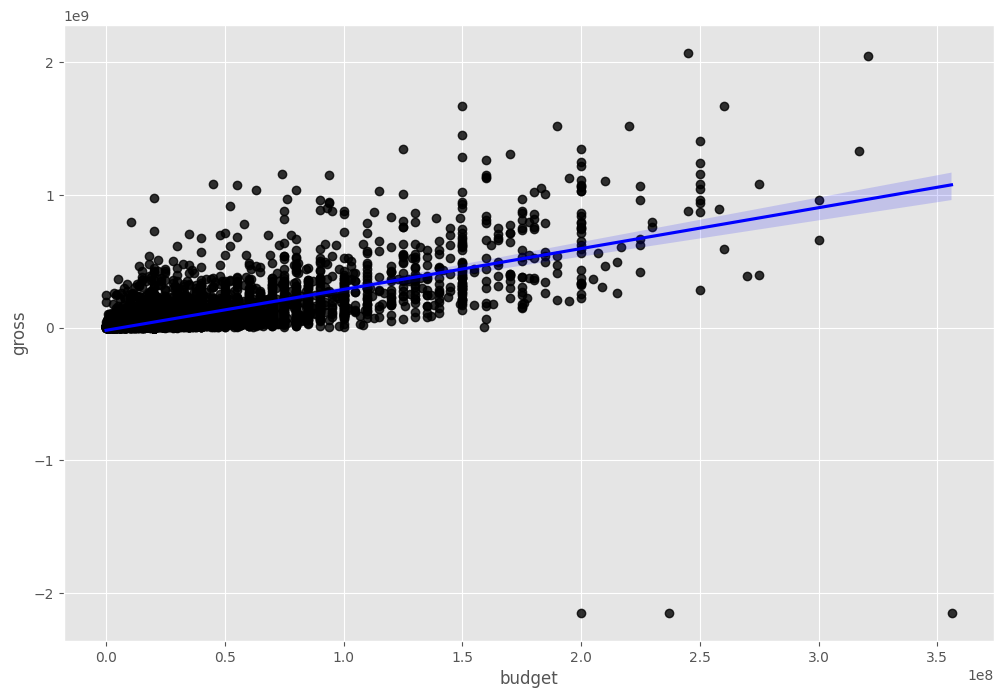

In [16]:
# PLot budget vs gross using seaborn

sns.regplot(x='budget',y='gross',data=df,scatter_kws={"color":"black"},line_kws={"color":"blue"})

In [17]:
df_numerized = df

for col_name in df_numerized.columns:
    if(df_numerized[col_name].dtype == 'object'):
        df_numerized[col_name] = df_numerized[col_name].astype('category')
        df_numerized[col_name] = df_numerized[col_name].cat.codes
        
df_numerized        

,name,rating,genre,year,score,votes,director,writer,star,country,budget,gross,company,runtime
0,6587,6,6,1980,8,927000,2589,4014,1047,54,19000000,46998772,2319,146
1,5573,6,1,1980,5,65000,2269,1632,327,55,4500000,58853106,731,104
2,5142,4,0,1980,8,1200000,1111,2567,1745,55,18000000,538375067,1540,124
3,286,4,4,1980,7,221000,1301,2000,2246,55,3500000,83453539,1812,88
4,1027,6,4,1980,7,108000,1054,521,410,55,6000000,39846344,1777,98
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,3705,6,6,2020,3,18,1500,2289,2421,55,7000,14000000,2281,90
7664,1678,6,4,2020,4,36,774,2614,1886,55,20000000,14000000,539,90
7665,4717,6,6,2020,5,29,2061,2683,2040,55,58750,14000000,941,97
7666,2843,6,6,2020,6,13000,1184,1824,450,55,15000,14000000,2281,120


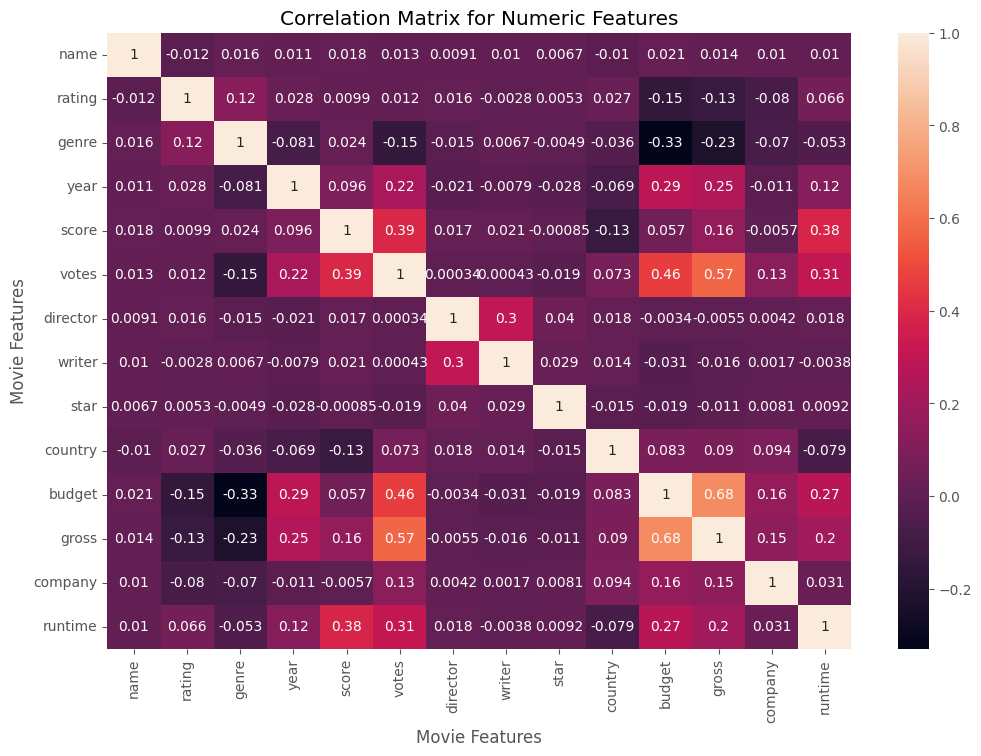

In [18]:
correlation_matrix = df.corr(method='pearson')
sns.heatmap(correlation_matrix,annot=True)
plt.title('Correlation Matrix for Numeric Features')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')
plt.show()